<a href="https://colab.research.google.com/github/anniechen0506/Machine-Learning-Fall-2023/blob/main/8_WineData_Clustering_%26_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#8. Wine Data - Clustering & PCA
###Annie Chen

This business report adopted unsupervised Machine Learning models, including clustering and Principal Component Analysis (PCA) to analyze a data set related to wine quality.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import plotly.figure_factory as ff
import pandas as pd
import seaborn as sns
from random import sample

from sklearn.preprocessing import MinMaxScaler, StandardScaler # For rescaling metrics to fit 0 to 1 range
from sklearn.metrics import multilabel_confusion_matrix, confusion_matrix
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
from scipy.spatial.distance import euclidean

#Data Preparation

First I loaded the dataset, got a preview of the data, then generated a heatmap to look at the correlation within these columns. Then, I did some data pre-processing steps such as dropping NULL values and scaling the data to make sure we were comparing wine to wine.

In [ ]:
#import dataset
!git clone https://github.com/danielbauer1979/ML_656.git

fatal: destination path 'ML_656' already exists and is not an empty directory.


In [ ]:
wine = pd.read_csv('ML_656/winequality-red.csv', sep = ';')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


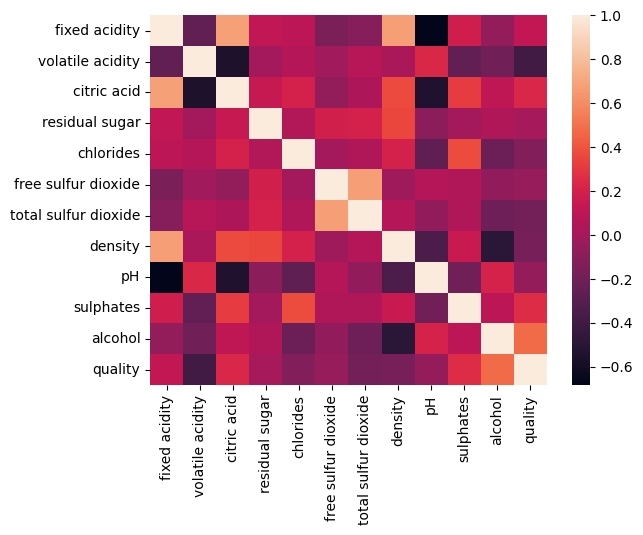

In [ ]:
sns.heatmap(wine.corr());

In [ ]:
wine = wine.dropna()

In [ ]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Scale the data to make sure we are comparing wine to wine

In [ ]:
scaler = MinMaxScaler()
scaler.fit(wine)
wine_sc = scaler.transform(wine)
wine_sc

array([[0.24778761, 0.39726027, 0.        , ..., 0.13772455, 0.15384615,
        0.4       ],
       [0.28318584, 0.52054795, 0.        , ..., 0.20958084, 0.21538462,
        0.4       ],
       [0.28318584, 0.43835616, 0.04      , ..., 0.19161677, 0.21538462,
        0.4       ],
       ...,
       [0.15044248, 0.26712329, 0.13      , ..., 0.25149701, 0.4       ,
        0.6       ],
       [0.11504425, 0.35958904, 0.12      , ..., 0.22754491, 0.27692308,
        0.4       ],
       [0.12389381, 0.13013699, 0.47      , ..., 0.19760479, 0.4       ,
        0.6       ]])

#Clustering
Finding subgroups in the dataset.

##1. K-Means Clustering:
Here,I would like to use K-Means clustering to find the subgroups in the
dataset. To decide on the number of clusters, I
evaluated how the within-sum-of-square varies
between the number of clusters by using an elbow
plot. In the plot, it appears that the sixth cluster
presents a reasonable choice, there is a bit of an “elbow” there, so I used 6 clusters to proceed.

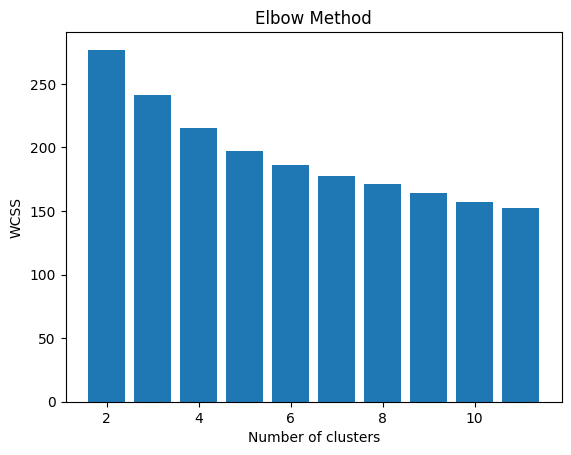

In [ ]:
wcss = []
for i in range(2, 12):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 1000, n_init = 10, random_state = 0)
    kmeans.fit(wine_sc)
    wcss.append(kmeans.inertia_)
plt.bar(range(2, 12), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

It appears that six clusters seem to present a reasonable choice, there is a bit of an "elbow" there. So let's go with six:

In [ ]:
kmeans = KMeans(n_clusters=6, init='k-means++', max_iter=1000, n_init=10, random_state=0)
kmeans.fit(wine_sc)

KMeans(max_iter=1000, n_clusters=6, n_init=10, random_state=0)

In [ ]:
#get the labels
kmeans.labels_

array([5, 5, 5, ..., 1, 1, 2], dtype=int32)

In [ ]:
wine['k_means_cl'] = kmeans.labels_

Let's compare the different clusters by evaluating the wine quality.

In [ ]:
wine[wine['k_means_cl'] == 0]['quality'].mean()

5.321428571428571

In [ ]:
wine[wine['k_means_cl'] == 1]['quality'].mean()

6.052173913043478

In [ ]:
wine[wine['k_means_cl'] == 2]['quality'].mean()

6.484496124031008

In [ ]:
wine[wine['k_means_cl'] == 3]['quality'].mean()

5.280757097791798

In [ ]:
wine[wine['k_means_cl'] == 4]['quality'].mean()

5.747081712062257

In [ ]:
wine[wine['k_means_cl'] == 5]['quality'].mean()

5.200392927308448

Let's relabel so it's increasing:

In [ ]:
def relab(label):
  if label == 0:
    return 0
  elif label == 1:
    return 1
  elif label == 2:
    return 5
  elif label == 3:
    return 2
  elif label == 4:
    return 4
  else:
    return 3

In [ ]:
kmlab = list(map(relab, kmeans.labels_))

In [ ]:
wine['k_means_cl'] = kmlab

##2. Hierarchical Clustering:
Let's use the hierarchical clustering algorithm in scikit (AgglomerativeClustering). Plotting a dendrogram is easier with the scipy.cluster.hierarchy, yet given the size of the dataset we don't see a ton here.

To compare with the k-means approach, let's run a hierarchical clustering also with six clusters.

In [ ]:
hierarch = AgglomerativeClustering(n_clusters=6)
hierarch.fit(wine_sc)

AgglomerativeClustering(n_clusters=6)

In [ ]:
hierarch.labels_

array([2, 2, 2, ..., 4, 4, 0])

In [ ]:
wine['k_hier_cl'] = hierarch.labels_

In [ ]:
wine[wine['k_hier_cl'] == 0]['quality'].mean()

6.266490765171504

In [ ]:
wine[wine['k_hier_cl'] == 1]['quality'].mean()

5.254658385093168

In [ ]:
wine[wine['k_hier_cl'] == 2]['quality'].mean()

5.276422764227642

In [ ]:
wine[wine['k_hier_cl'] == 3]['quality'].mean()

5.7974683544303796

In [ ]:
wine[wine['k_hier_cl'] == 4]['quality'].mean()

5.892156862745098

In [ ]:
wine[wine['k_hier_cl'] == 5]['quality'].mean()

5.25

In [ ]:
def relab2(label):
  if label == 0:
    return 5
  elif label == 1:
    return 2
  elif label == 2:
    return 0
  elif label == 3:
    return 4
  elif label == 4:
    return 3
  else:
    return 1

In [ ]:
hierlab = list(map(relab2, hierarch.labels_))

In [ ]:
wine['k_hier_cl'] = hierlab

## Compare the Two
To compare the two clustering methods, I generated a confusion matrix and two boxplots. From the confusion matrix, there’s no one-to-one correspondence between the clusters identified by k-means and hierarchical clustering. Moreover, some clusters show reasonable agreement, suggesting that both methods detect a similar structure for certain data subsets.

In [ ]:
labels = [0,1,2,3,4,5]
confusion_matrix(wine['k_means_cl'],wine['k_hier_cl'],labels=labels)

array([[  0,  28,   0,   0,   0,   0],
       [ 31,   0,   8, 179,   0,  12],
       [ 13,   2, 268,   6,   1,  27],
       [431,  10,  33,  19,   0,  16],
       [  9,   4,  10,   0, 154,  80],
       [  8,   0,   3,   0,   3, 244]])

There's a few overlapping cluster. Thus, we can say that assigning points to clusters is highly obvious.

#Visualizing Clusters

Both the above box plots indicate a similar
pattern with a relatively consistent median
quality score across clusters. For the
variability, both methods show a similar
spread and outlier pattern, suggesting that regardless of the clustering methods, the
‘quality’ distribution within clusters is quite consistent.

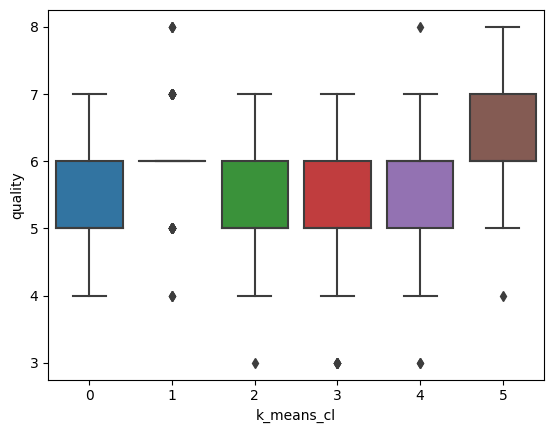

In [ ]:
sns.boxplot(x = "k_means_cl", y = "quality", data = wine)
plt.show()

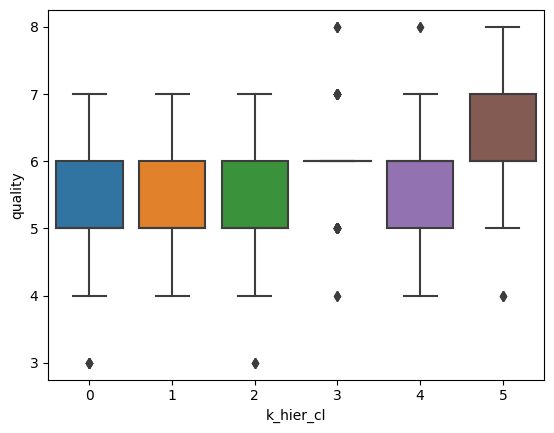

In [ ]:
sns.boxplot(x = "k_hier_cl", y = "quality", data = wine)
plt.show()

#Principan Component Analysis (PCA)
Recall that the dataset contains 11 features. As we explained above, PCA tries to determine the most relevant "directions" to span this space. Here, a "direction" corresponds to some weighted average of the data. The largest principal component is the most important direction, the second largest principal component is the second most important direction, etc.

We want to choose the number of principal components that accounts for a lot of variation in terms of "explained variance".

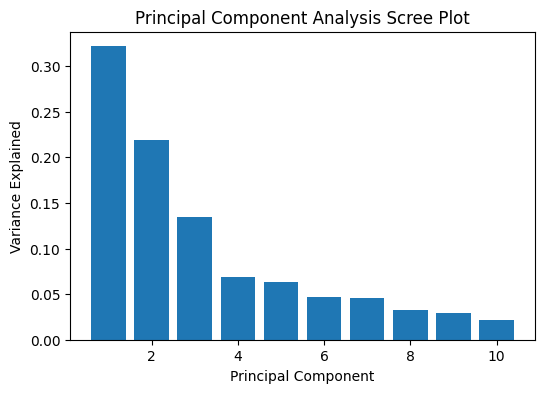

In [ ]:
plt.figure(figsize=(6,4))
pca = PCA(n_components=10)
pca_fit = pca.fit(wine_sc)
pc_values = np.arange(pca_fit.n_components_) + 1
plt.bar(pc_values, pca.explained_variance_ratio_)
plt.title('Principal Component Analysis Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

To choose the number of principal components that accounts for a lot of variation in terms of “explained variance”, we use the scree plot to show the explained variance. By adopting the first three components, we can explain 67.4% of the variance in the data.

In [ ]:
pca.explained_variance_ratio_[0]+pca.explained_variance_ratio_[1]+pca.explained_variance_ratio_[2]

0.6747465084196177

of the variance in the data. So while there is still a lot of other variation, the first three principal components explain a lot already.

So let's work with those:

In [ ]:
pca = PCA(n_components = 4)
principalComponents = pca.fit(wine_sc)
principalComponents.components_
PCweights = pd.DataFrame(data = principalComponents.components_, columns = ["fixed acidity", "volatile acidity", "citric acid",	"residual sugar",	"chlorides",	"free sulfur dioxide", "total sulfur dioxide",	"density",	"pH",	"sulphates", "alcohol", "quality"])
PCweights.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.498377,-0.245521,0.665602,0.066288,0.060950,-0.071121,-0.022875,0.288547,-0.316892,0.138499,0.011995,0.177811
1,-0.128708,-0.213490,0.074862,-0.055737,-0.089614,-0.115484,-0.177564,-0.392184,0.127121,0.062697,0.641699,0.539048
2,-0.144625,-0.132855,0.137800,0.148591,0.011119,0.779884,0.529779,-0.075539,0.018587,0.104731,0.071138,0.096308
3,0.186508,0.202609,-0.437210,0.201975,-0.054257,0.104181,-0.055019,0.408726,0.019458,0.086981,-0.170044,0.686642


*   For PC1 - We can see that “citric acid” and “fixed acidity” have high positive weights, suggesting that acid-related factors would affect wine quality.
*   For PC3 - “free” & “total” “sulfur dioxide” have higher weights. Sulfur dioxide is used to preserve wine, meaning that good preservation may also lead to high wine quality.



We used PCA to reduce the dimensionality of our wine dataset, select 3 principal components.

Here we see that each component corresponds to the weight it puts on each of the 11 features.

Let's look at the scores::

In [ ]:
principalComponentScores = pca.fit_transform(wine_sc)
pc_scores = pd.DataFrame(data = principalComponentScores, columns = ['PC1', 'PC2','PC3', 'PC4'])
pc_scores

,PC1,PC2,PC3,PC4
0,-0.308010,-0.198750,-0.157373,0.083623
1,-0.265056,-0.237308,0.057130,0.098049
2,-0.222379,-0.191181,-0.065895,0.053514
3,0.424268,-0.057361,0.042600,-0.024394
4,-0.308010,-0.198750,-0.157373,0.083623
...,...,...,...,...
1594,-0.353614,-0.020534,0.157276,-0.071733
1595,-0.315667,0.163685,0.297947,0.057911
1596,-0.221657,0.139932,0.163725,0.055212
1597,-0.356954,-0.047596,0.165719,-0.053007


And let's add these to our data:

In [ ]:
wine = wine.reset_index()

In [ ]:
wine = pd.concat([wine,pc_scores], axis=1)

#PCA and Clusters
To interpret the connection of our clusters and the PC-s, I checked how the clusters relate to the first principal component, which I interpreted as an 'acid-related factor'. Clusters 1, 2, and 3 have lower median scores on PC1, indicating that wines in these clusters tend to have characteristics associated with lower acidity, which might contribute to a less desirable acidity profile.

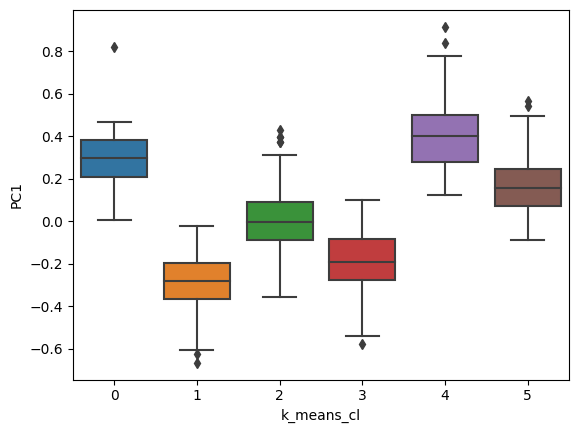

In [ ]:
sns.boxplot(x = "k_means_cl", y = "PC1", data = wine)
plt.show()

I also looked at the connections between clusters and PC3, which I interpreted as a ‘sulfur dioxide-related factor’. We can see that those median scores of clusters are relatively lower than PC1, the acid-related factor. Moreover, cluster 3 and 4 have low scores on PC3, arguably these are low-sulfur dioxide wines, which may lead to not quite good wine quality.

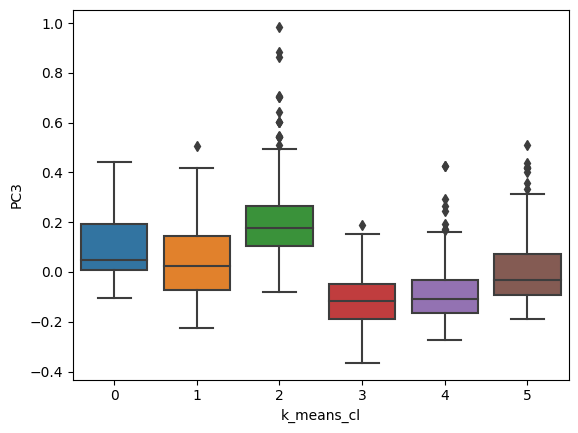

In [ ]:
sns.boxplot(x = "k_means_cl", y = "PC3", data = wine)
plt.show()

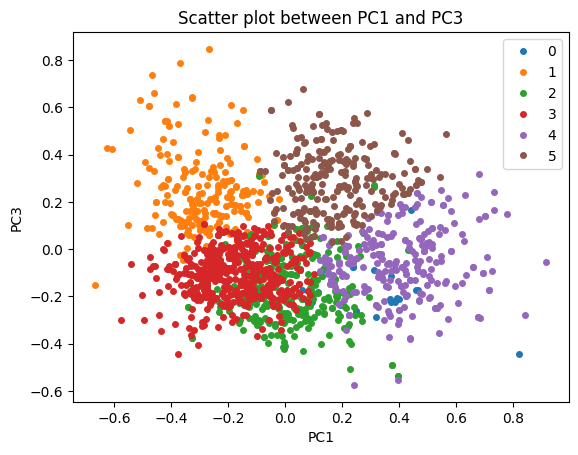

In [ ]:
groups = wine.groupby("k_means_cl")
for name, group in groups:
    plt.plot(group.PC1, group.PC2, marker='o', linestyle='', markersize=4, label=name)
plt.title("Scatter plot between PC1 and PC3")
plt.xlabel("PC1")
plt.ylabel("PC3")
plt.legend()

In conclusion, the scatter plot demonstrates the relationship between the first and third principal components (PC1
and PC3) of the wine dataset, with points colored according to the k-means cluster assignments. This plot gives insights into the natural groupings with the data
and informs both the interpretation of PCA components and the efficiency of the clustering, suggesting retailers to target for different clusters to get high quality wine.